# Supermarket Sales Analysis Project

## Target of project
#### - Practice using libraries like pandas, matplotlib, numpy
#### - Practice explaining targeted problems
#### - Practice visualization

## Data 
#### Data I used comes from a website called "Kaggle" which is a data science community with resources
#### The file i used can be found at link: https://www.kaggle.com/datasets/lovishbansal123/sales-of-a-supermarket

## Data description:
- Invoice id: Computer generated sales slip invoice identification number.
- Branch: Branch of supercenter (3 branches are available identified by A, B and C).
- City: Location of supercenters.
- Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.
- Gender: Gender type of customer.
- Product line: General item categorization groups - Electronic accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel.
- Unit price: Price of each product in $.
- Quantity: Number of products purchased by customer.
- Tax: 5% tax fee for customer buying.
- Total: Total price including tax.
- Date: Date of purchase (Record available from January 2019 to March 2019).
- Time: Purchase time (10am to 9pm).
- Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet).
- COGS: Cost of goods sold.
- Gross margin percentage: Gross margin percentage.
- Gross income: Gross income.
- Rating: Customer stratification rating on their overall shopping experience (On a scale of 1 to 10).

## Importing libraries

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data and saving variables

In [14]:
supermarket_data = pd.read_csv("data/supermarket_sales.csv", delimiter=',', decimal='.')

## Data exploration

In [15]:
supermarket_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [16]:
null_counts = supermarket_data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [17]:
supermarket_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


## Analysis of categorical data

In [18]:
text_columns = supermarket_data.select_dtypes(include=['object']).columns

In [19]:
text_columns = text_columns.drop(['Invoice ID', 'Date', 'Time'])

In [20]:
text_columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment'], dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

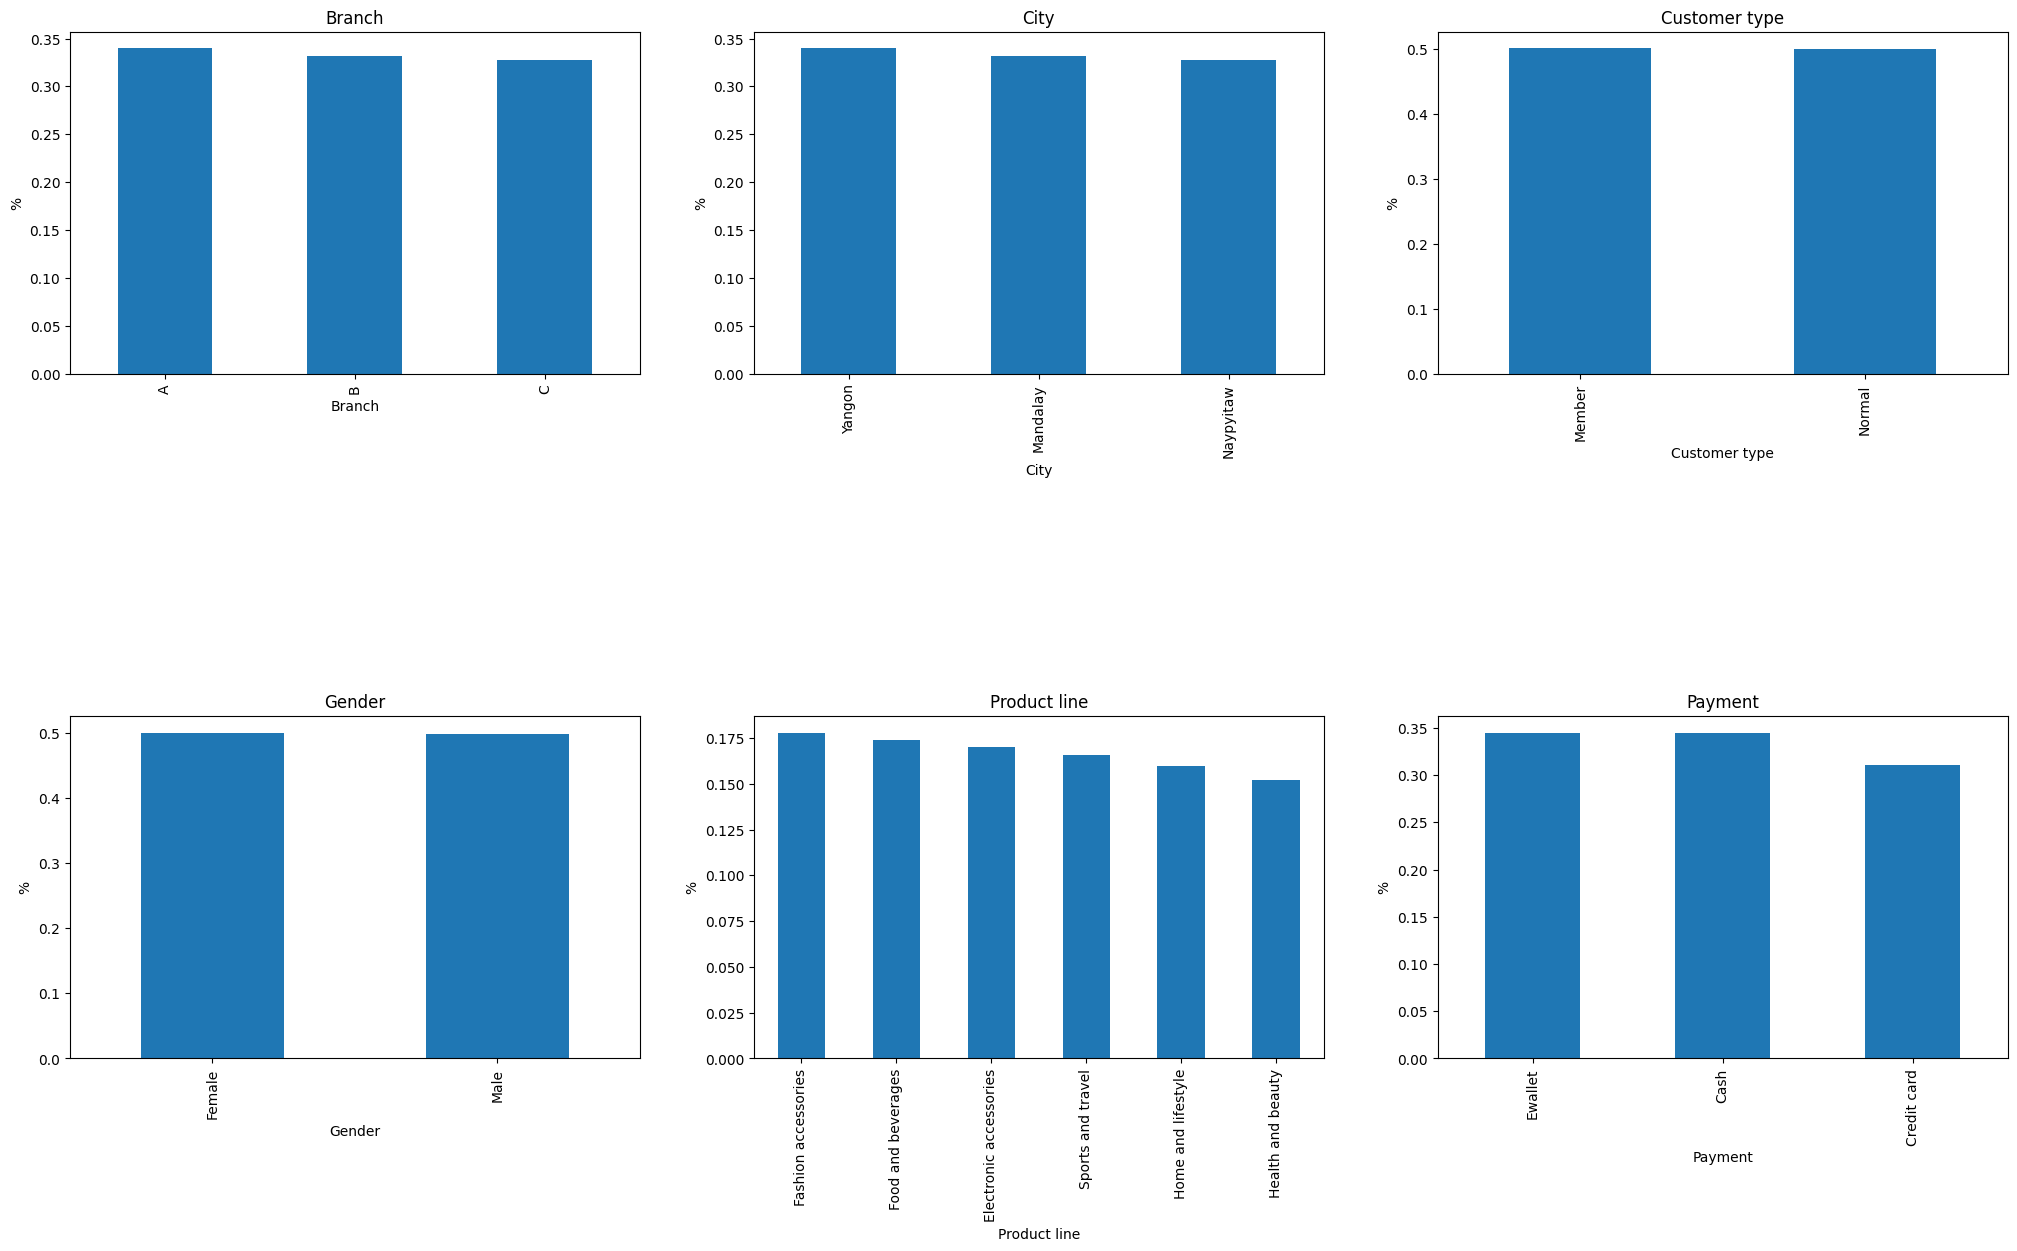

In [21]:
# Percentage of each property
fig = plt.figure(figsize=(25,40))
for i, prop in enumerate(text_columns):
    ax = fig.add_subplot(5,3,i+1)
    ax.set_title(prop)
    (supermarket_data[prop].value_counts()/len(supermarket_data[prop])).plot.bar()
    ax.set(ylabel = "%")
plt.subplots_adjust(hspace=1, wspace=0.2)
plt.show

## Analysis of numerical data

In [22]:
num_columns = supermarket_data.select_dtypes(exclude=['object']).columns
num_columns

Index(['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs',
       'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

## Searching for outliers


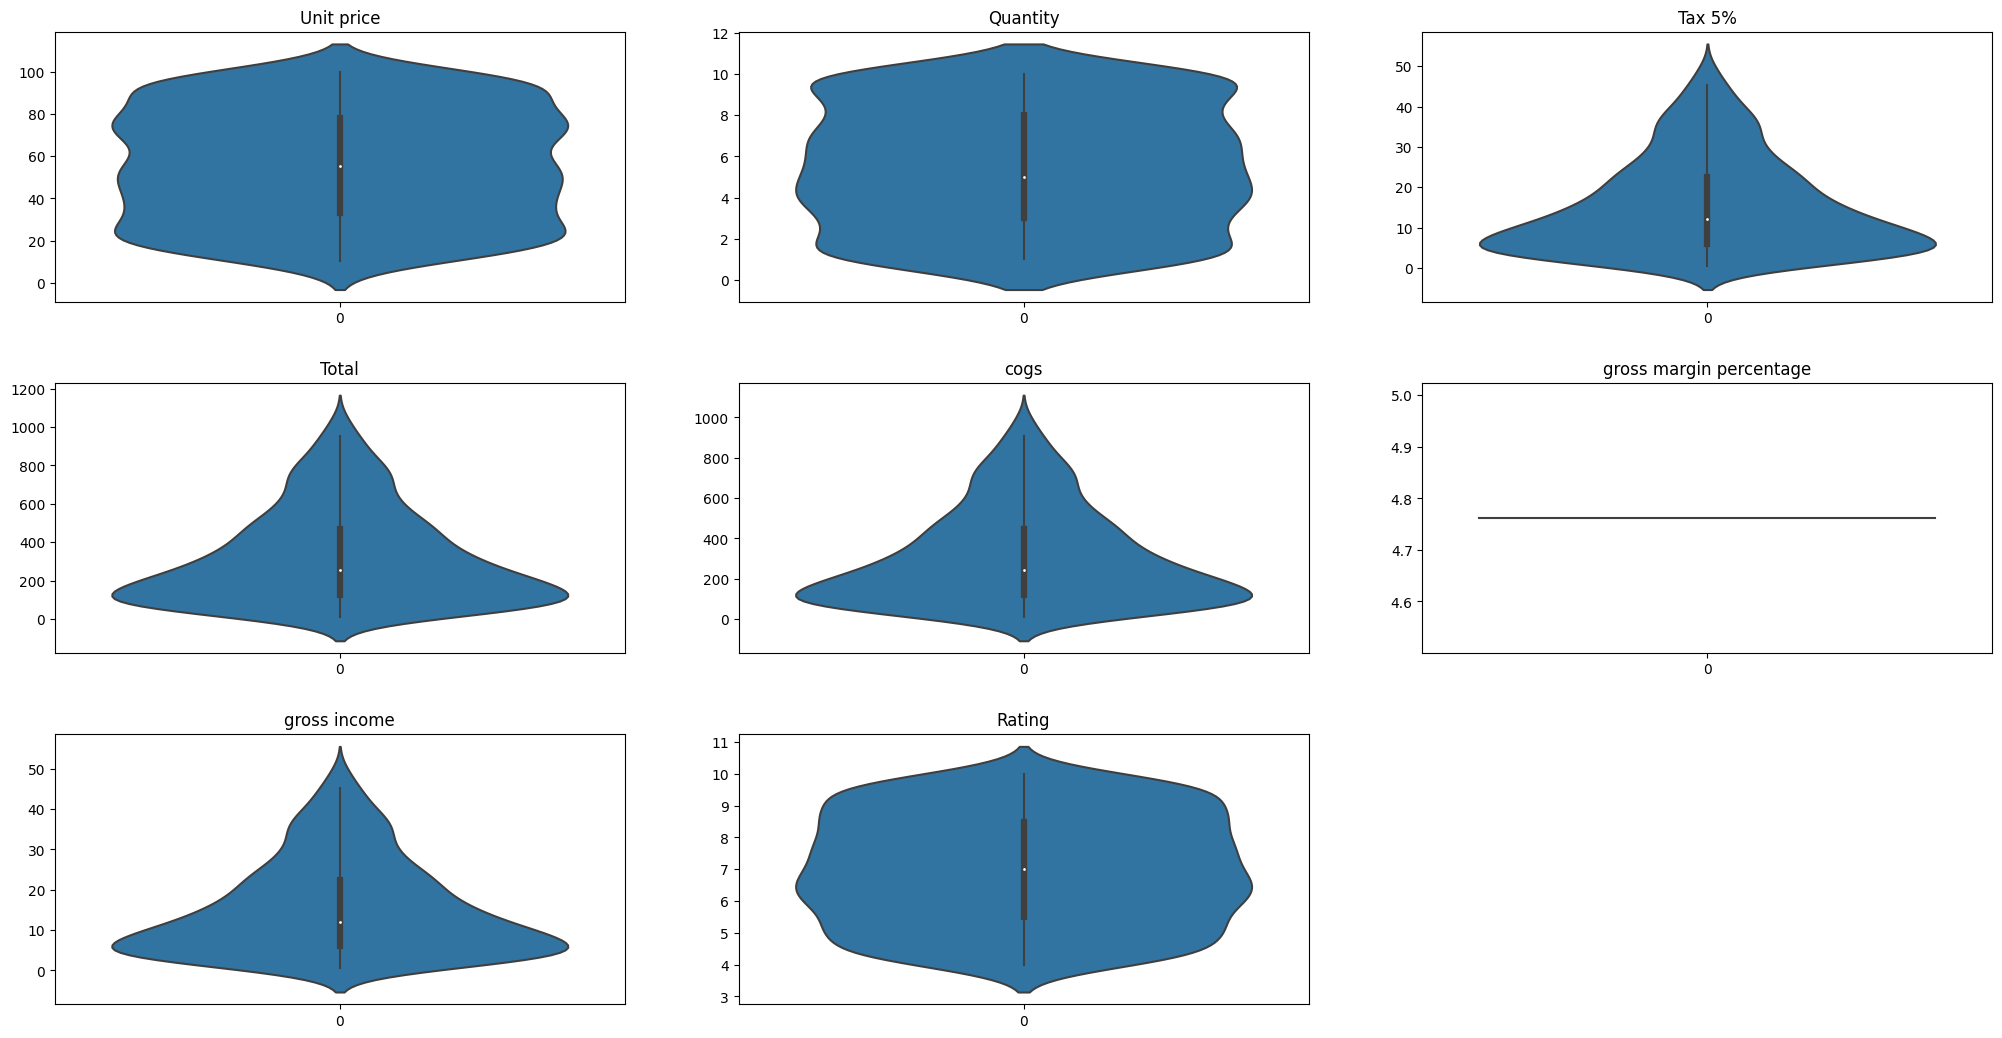

In [23]:
fig = plt.figure(figsize=(25,40))
for i , prop in enumerate(num_columns):
    ax = fig.add_subplot(9,3,i+1)
    ax.set_title(prop)
    sns.violinplot(data=supermarket_data[prop], ax=ax)
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)
plt.show()

## Missing data

In [24]:
# calculated percentage of missing data
perc=((supermarket_data.isnull()).sum())/((~supermarket_data.isnull()).sum()+(supermarket_data.isnull()).sum())
count_clean=round(perc[perc>0],2)*100

#wyliczam ilości misingów
count_clean=supermarket_data.isnull().sum()[supermarket_data.isnull().sum()>0]
summary=pd.concat([count_clean,perc],axis=1)
summary.columns=["Count of missing","% of missing"]
summary

,Count of missing,% of missing
Invoice ID,NaN,0.0
Branch,NaN,0.0
City,NaN,0.0
Customer type,NaN,0.0
Gender,NaN,0.0
Product line,NaN,0.0
Unit price,NaN,0.0
Quantity,NaN,0.0
Tax 5%,NaN,0.0
Total,NaN,0.0


# Example charts

## Calculate the total gross income for each city

In [25]:
gross_income_by_city = supermarket_data.groupby('City')['gross income'].sum().reset_index()

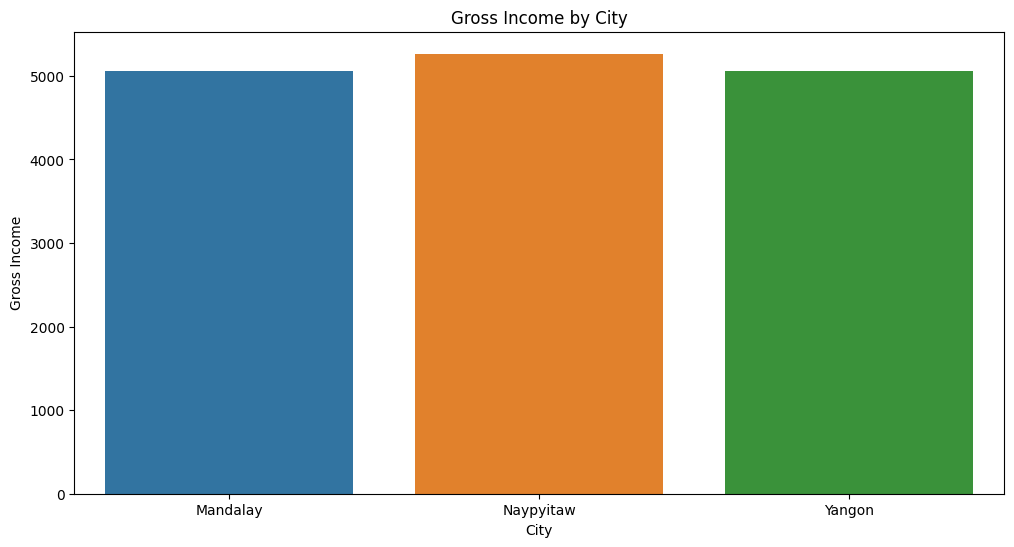

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(x='City', y='gross income', data=gross_income_by_city)
plt.title('Gross Income by City')
plt.xlabel('City')
plt.ylabel('Gross Income')
plt.show()

## Calculate the total gross income for each gender

In [27]:
profits_by_gender = supermarket_data.groupby('Gender')['gross income'].sum().reset_index()

<Figure size 800x600 with 0 Axes>

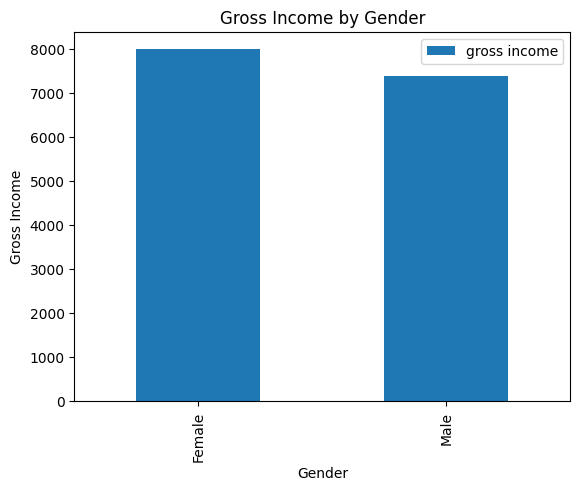

In [28]:
plt.figure(figsize=(8, 6))
profits_by_gender.plot(kind='bar', x='Gender', y='gross income')
plt.title('Gross Income by Gender')
plt.xlabel('Gender')
plt.ylabel('Gross Income')
plt.show()

## Calculate the percentage of sales for each product line within each gender

In [29]:
sales_by_gender_product = supermarket_data.groupby(['Gender', 'Product line'])['Total'].sum().reset_index()

In [30]:
sales_by_gender_product['Percentage'] = sales_by_gender_product.groupby('Gender')['Total'].transform(lambda x: x / x.sum())

Text(0, 0.5, 'Percentage of Sales')

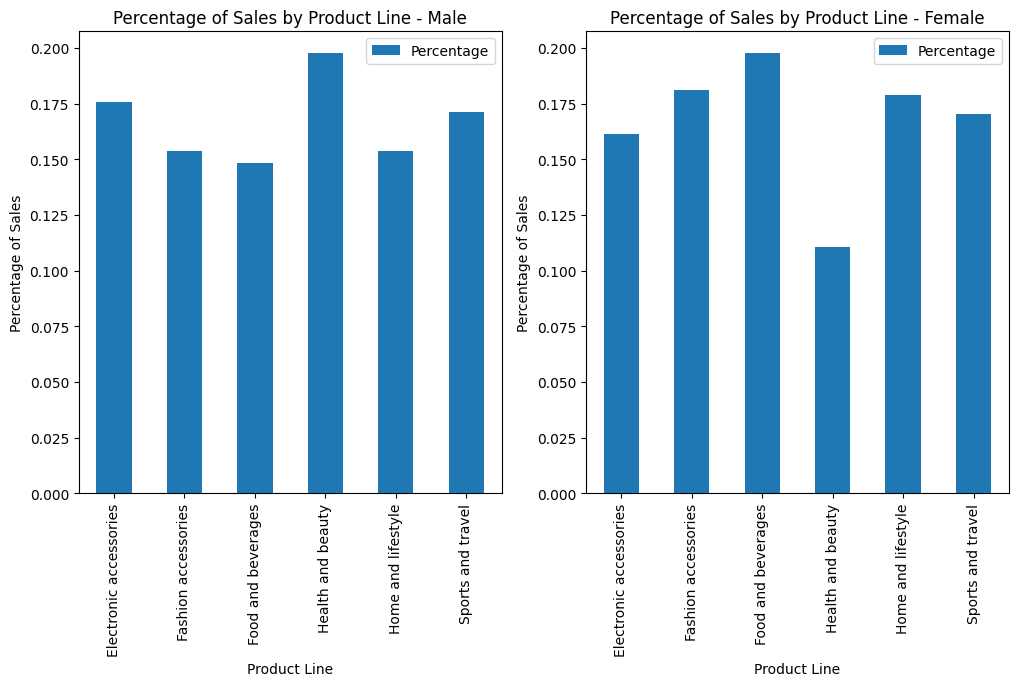

In [31]:
# Create the charts
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Chart for Male
male_sales = sales_by_gender_product[sales_by_gender_product['Gender'] == 'Male']
male_sales.plot(kind='bar', x='Product line', y='Percentage', ax=ax1)
ax1.set_title('Percentage of Sales by Product Line - Male')
ax1.set_xlabel('Product Line')
ax1.set_ylabel('Percentage of Sales')

# Chart for Female
female_sales = sales_by_gender_product[sales_by_gender_product['Gender'] == 'Female']
female_sales.plot(kind='bar', x='Product line', y='Percentage', ax=ax2)
ax2.set_title('Percentage of Sales by Product Line - Female')
ax2.set_xlabel('Product Line')
ax2.set_ylabel('Percentage of Sales')